## Gather the data

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd

import matplotlib.pyplot as plt
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_ddg(dg_A, dg_B):
    return dg_A * KT_KCALMOL - dg_B * KT_KCALMOL

def compute_error(ddg_A, ddg_B):
    return (ddg_A**2 + ddg_B**2)**0.5 * KT_KCALMOL

In [3]:
# Retrieve free energies

main_dir = 46
sub_dirs = range(0, 40)
d_results = {}
for sub_dir in sub_dirs:
    d_results[sub_dir] = {}
    for phase in ['apo']:
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_1/{phase}_free_energy_bootstrapped_10ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results


In [4]:
# Format the data appropriately for cinnabar

titles = ["Y2F", "Y2A", "W2F", "T2A", "E2A", "D2A", "K2A", "R2A", "R2Q", "H2A", "F2Y", "A2Y", "F2W", "A2T", "A2E", "A2D", "A2K", "A2R", "Q2R", "A2H"]

to_plot = []

for sub_dir in range(20):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir + 20]['apo']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir + 20]['apo']["dDeltaf"][0, -1])
    if sub_dir in range(10):
        to_plot.append([titles[sub_dir][:-1], titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg, dddg*2, 0])
    else:
        to_plot.append(["-" + titles[sub_dir][:-1], "-" + titles[sub_dir][-1] + titles[sub_dir][1:-1], ddg * -1, dddg*2, 0])

        

In [5]:
to_plot

[['Y2', 'F2', 0.2776429217431975, 0.6758040055778687, 0],
 ['Y2', 'A2', 0.45951363572169157, 0.9507743245823727, 0],
 ['W2', 'F2', 0.09072065442693988, 0.8716879906300535, 0],
 ['T2', 'A2', 0.4761419507914191, 0.3416730022067902, 0],
 ['E2', 'A2', 4.968964294368026, 1.5666996017150017, 0],
 ['D2', 'A2', 4.818607808571871, 1.4534163203939745, 0],
 ['K2', 'A2', -1.850820434868794, 1.824183555936567, 0],
 ['R2', 'A2', -1.4428994083852729, 2.0676453020894963, 0],
 ['R2', 'Q2', -1.785059134908348, 2.2558740312495487, 0],
 ['H2', 'A2', 0.8763792397543497, 0.7000441076383892, 0],
 ['-F2', '-Y2', -0.033148223578866265, 0.589453360833787, 0],
 ['-A2', '-Y2', 0.5655216951844437, 0.9706365659694671, 0],
 ['-F2', '-W2', 0.14883577224093314, 0.8730880713965425, 0],
 ['-A2', '-T2', 0.6936924116348742, 0.34921142189556353, 0],
 ['-A2', '-E2', 5.0169223860800685, 1.90918832179081, 0],
 ['-A2', '-D2', 5.155700031387056, 1.6469930146839293, 0],
 ['-A2', '-K2', -1.8444238159755741, 1.6533216370915496, 0]

## -Reverse vs Forward plot

In [6]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from cinnabar import plotting, stats, wrangle

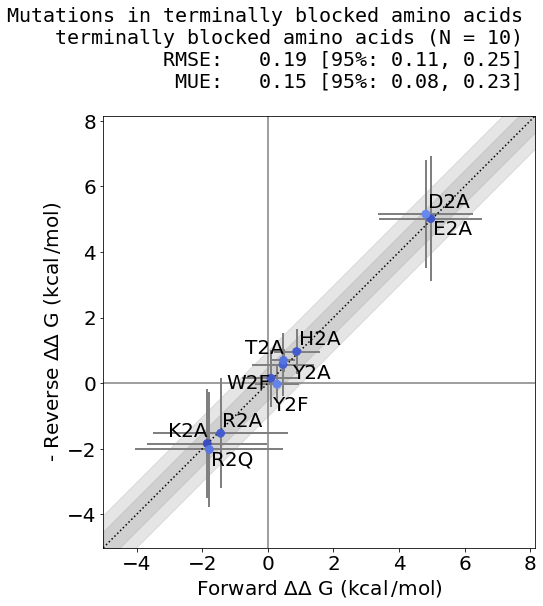

In [8]:
# Format the data appropriately
x = [entry[2] for i, entry in enumerate(to_plot) if i < 10] # forward
y = [entry[2] for i, entry in enumerate(to_plot) if i >= 10] # reverse
xerr =  [entry[3] for i, entry in enumerate(to_plot) if i < 10] # forward
yerr = [entry[3] for i, entry in enumerate(to_plot) if i >= 10] # reverse
x_data = np.asarray(x)
y_data = np.asarray(y)

# Generate the plot
filename = '/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/cinnabar_plot_10ns_dipeptide.pdf'
plot = plotting._master_plot(
    x_data,
    y_data,
    xerr=xerr,
    yerr=yerr,
    filename=filename,
    title="Mutations in terminally blocked amino acids",
    target_name="terminally blocked amino acids",
    xlabel="Forward",
    ylabel="- Reverse",
    units=r'$\mathrm{kcal\,/mol}$', 
    figsize=10, 
    dpi=500,
    axis_padding=3.0,
    data_labels=titles[:10],
    font_sizes={"title":20, "labels": 20, "other": 20},
    scatter_kwargs={'s': 60}
)
